# How to use SDFC

## 1. Introduction

### 1.1 Generalities on SDFC

### 1.2 Architecture

### 1.3 Import SDFC in python

The proposal syntax to import SDFC in python is

In [1]:
import SDFC as sd                 ## Here we have all parametric laws
import SDFC.NonParametric as sdnp ## Here some non-parametric functions with covariates, as mean and quantile
import SDFC.tools as sdt          ## Some plot function

Just add some useful import

In [2]:
import numpy as np
import scipy.stats as sc
%matplotlib notebook
import matplotlib.pyplot as plt

### 1.4 Testing dataset 

<IPython.core.display.Javascript object>


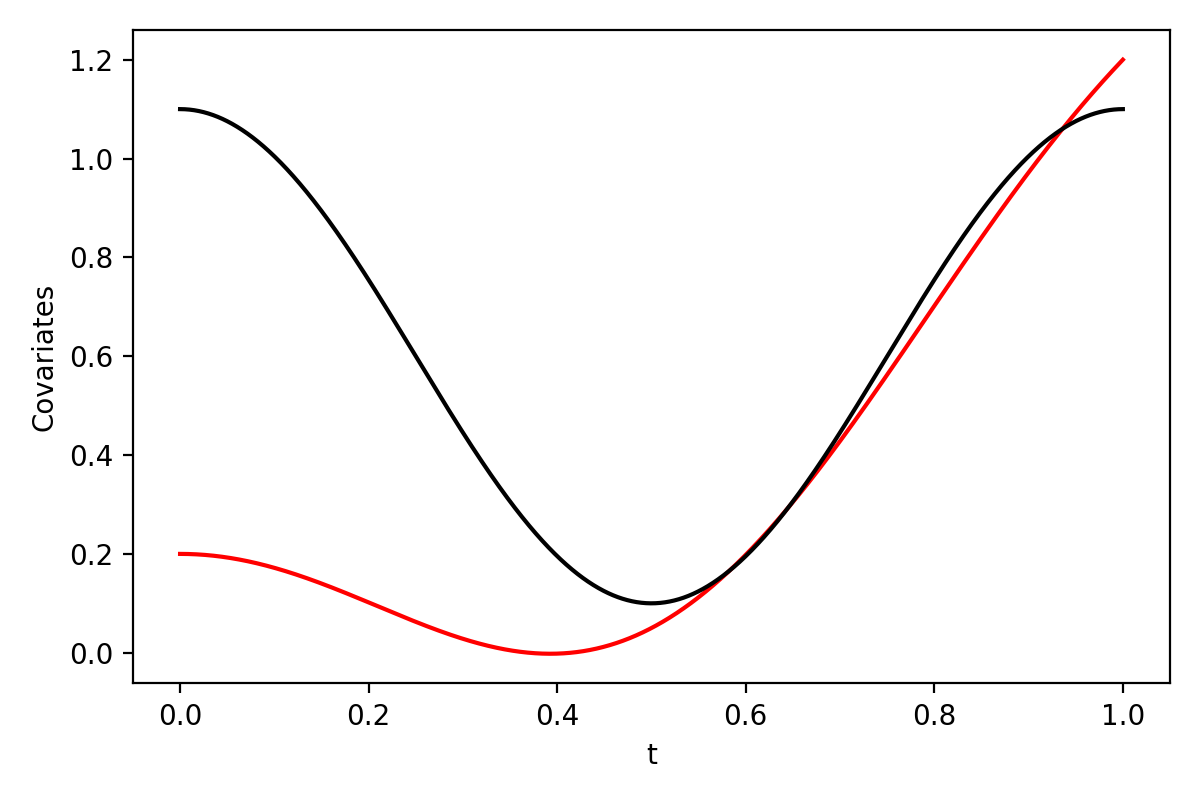

In [9]:
size = 2000
t    = np.linspace( 0 , 1 , size )
X0   = t**2 + 0.2 * np.cos( 2 * np.pi * t )
X1   = ( np.cos( 2 * np.pi * t ) + 1. ) / 2. + 0.1

fig = plt.figure( figsize = (6,4) )
ax  = fig.add_subplot(1,1,1)
ax.plot( t , X0 , color = "red"   , linestyle = "-" , label = "X0" )
ax.plot( t , X1 , color = "black" , linestyle = "-" , label = "X1" )
ax.set_xlabel( "t" )
ax.set_ylabel( "Covariates" )
fig.set_tight_layout(True)
fig.show()

## 2. Parametric Statistical laws

### 2.1 Abstract Law : template of all laws

### 2.2 Generic way to fit a parametric law, example with a Normal distribution

We start by define a dataset $Y$, from a Normal law $\mathcal{N}(\mu_t,\sigma_t)$, with:
- $\mu_t = \mu_0 + X_0 \mu_1$
- $\sigma_t = \sigma_0 + X_1 \sigma_1$


In [4]:
loc   = 0.2 + 0.8 * X0
scale = 0.1 * X1
Y     = np.random.normal( loc = loc , scale = scale , size = size )

A fit using the maximum likelihood estimator is performed, with $100$ bootstrap. The keywords `c_loc` and `c_scale` define the two covariates of `loc` ($\mu$) and `scale` ($\sigma$) parameters. Print the law print a summary of coefficients fitted.

In [13]:
law_norm = sd.Normal( method = "MLE" , n_bootstrap = 100 )
law_norm.fit( Y , c_loc = X0 , c_scale = X1 )
print(law_norm)

+--------------+--------+-----------+----------------+-----------------+----------------+
| Normal (mle) |  Link  |   Type    |      coef      | Quantile 0.025  | Quantile 0.975 |
+==============+========+===========+================+=================+================+
| loc          | IdLink | Covariate | [0.199, 0.803] | [0.198, 0.796]  | [0.201, 0.813] |
+--------------+--------+-----------+----------------+-----------------+----------------+
| scale        | IdLink | Covariate | [0.0, 0.1]     | [-0.001, 0.097] | [0.001, 0.105] |
+--------------+--------+-----------+----------------+-----------------+----------------+



If $\mu$ (or $\sigma$) are already known, you can pass it as fix parameter with the syntax `f_<param>`. Here we propose first to fix the `loc` parameter, and second to fix the `scale` parameter.

In [14]:
law_norm_fl = sd.Normal() ## Fit with fix loc
law_norm_fl.fit( Y , f_loc = loc , c_scale = X1 )
law_norm_fsc = sd.Normal() ## Fit with fix scale
law_norm_fsc.fit( Y , c_loc = X0 , f_scale = scale )
print(law_norm_fl)
print(law_norm_fsc)

+--------------+--------+-----------+------------+
| Normal (mle) |  Link  |   Type    |    coef    |
+==============+========+===========+============+
| loc          | IdLink | Fix       | None       |
+--------------+--------+-----------+------------+
| scale        | IdLink | Covariate | [0.0, 0.1] |
+--------------+--------+-----------+------------+

+--------------+--------+-----------+----------------+
| Normal (mle) |  Link  |   Type    |      coef      |
+==============+========+===========+================+
| loc          | IdLink | Covariate | [0.199, 0.803] |
+--------------+--------+-----------+----------------+
| scale        | IdLink | Fix       | None           |
+--------------+--------+-----------+----------------+



Sometimes, it can be useful to pass a link function to a parameter. For example, to ensure the positivity of the scale we can assume that:
$\sigma_t = \exp(\sigma_0+\sigma_1 X_1)$
It is easy with the generic keyword `l_<param>`.

In [16]:
law_norm_lf = sd.Normal()
law_norm_lf.fit( Y , c_loc = X0 , c_scale = X1 , l_scale = sdt.ExpLink() )
print(law_norm_lf)

+--------------+--------------+-----------+-----------------+
| Normal (mle) |     Link     |   Type    |      coef       |
+==============+==============+===========+=================+
| loc          | IdLink       | Covariate | [0.199, 0.801]  |
+--------------+--------------+-----------+-----------------+
| scale        | ExpLink (>0) | Covariate | [-4.266, 2.081] |
+--------------+--------------+-----------+-----------------+



Finnaly, we plot the dataset, the parameters fitted, and the confidence interval

<IPython.core.display.Javascript object>


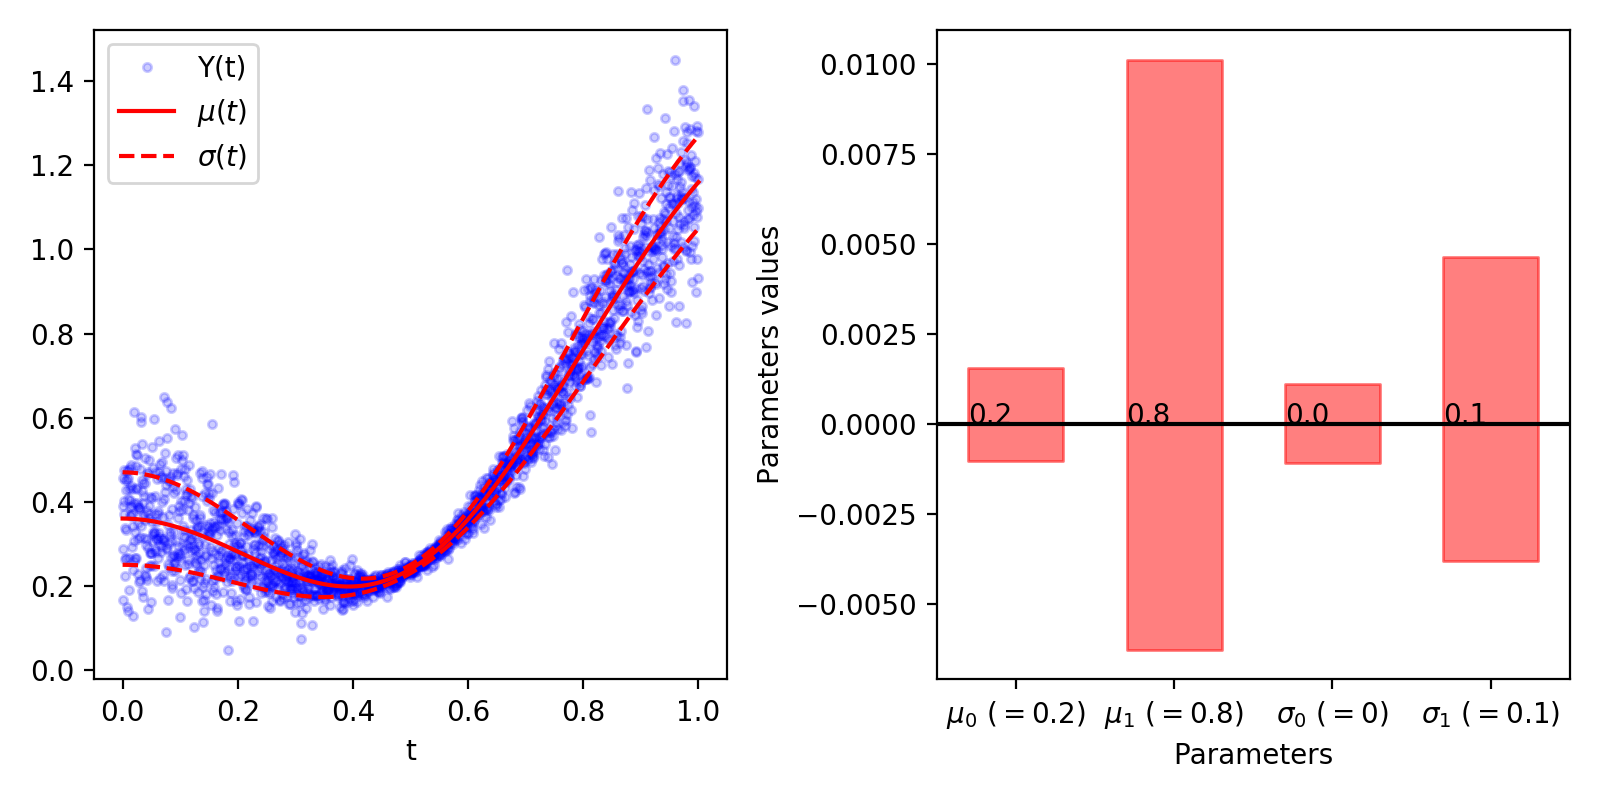

In [15]:
nrow,ncol = 1,2
fig = plt.figure( figsize = (8,4) )

ax = fig.add_subplot( nrow , ncol , 1 )
ax.plot( t , Y , color = "blue" , linestyle = "" , marker = "." , alpha = 0.2 , label = "Y(t)" )
ax.plot( t , loc , color = "red" , linestyle = "-" , label = r"$\mu(t)$" )
ax.plot( t , loc + scale , color = "red" , linestyle = "--" , label = r"$\sigma(t)$" )
ax.plot( t , loc - scale , color = "red" , linestyle = "--" )
ax.set_xlabel("t")
ax.legend( loc = "upper left")

ax = fig.add_subplot( nrow , ncol , 2 )
ax = sdt.plot_confidences_intervals( law_norm , ax )
ax.set_xticklabels( [r"$\mu_0\ (=0.2)$",r"$\mu_1\ (=0.8)$",r"$\sigma_0\ (=0)$",r"$\sigma_1\ (=0.1)$"] )

fig.set_tight_layout(True)
fig.show()

### 2.3 Example with the GEV distribution

## 3. Non Parametric Statistics

### 3.1 Classic statistics (mean, variance, etc)

### 3.2 Quantile Regression

## 4. Useful tools

### 4.1 Link Function

### 4.2 Plot confidence interval of parameters